This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?
TensorFlow is a Python-based, free, open source machine learning platform, developed primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to enable engineers and researchers to manipulate mathematical expressions over numerical tensors. But TensorFlow goes far beyond the scope of NumPy in the following ways:

It can automatically compute the gradient of any differentiable expression (as you saw in chapter 2), making it highly suitable for machine learning.

It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hardware accelerators.

Computation defined in TensorFlow can be easily distributed across many machines.

TensorFlow programs can be exported to other runtimes, such as C++, JavaScript (for browser-based applications), or TensorFlow Lite (for applications running on mobile devices or embedded devices), etc. This makes TensorFlow applications easy to deploy in practical settings.

It’s important to keep in mind that TensorFlow is much more than a single library. It’s really a platform, home to a vast ecosystem of components, some developed by Google and some developed by third parties. For instance, there’s TF-Agents for reinforcement-learning research, TFX for industry-strength machine learning workflow management, TensorFlow Serving for production deployment, and there’s the TensorFlow Hub repository of pretrained models. Together, these components cover a very wide range of use cases, from cutting-edge research to large-scale production applications.

## What's Keras?
Keras is a deep learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.

Through TensorFlow, Keras can run on top of different types of hardware (see figure 3.1)—GPU, TPU, or plain CPU—and can be seamlessly scaled to thousands of machine
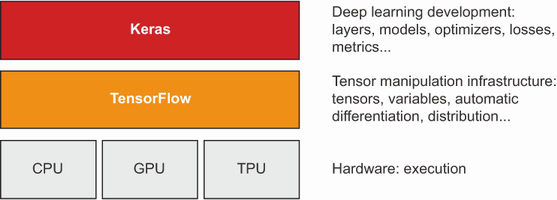
Keras is known for prioritizing the developer experience. It’s an API for human beings, not machines. It follows best practices for reducing cognitive load: it offers consistent and simple workflows, it minimizes the number of actions required for common use cases, and it provides clear and actionable feedback upon user error. This makes Keras easy to learn for a beginner, and highly productive to use for an expert.

Keras has well over a million users as of late 2021, ranging from academic researchers, engineers, and data scientists at both startups and large companies to graduate students and hobbyists. Keras is used at Google, Netflix, Uber, CERN, NASA, Yelp, Instacart, Square, and hundreds of startups working on a wide range of problems across every industry. Your YouTube recommendations originate from Keras models. The Waymo self-driving cars are developed with Keras models. Keras is also a popular framework on Kaggle, the machine learning competition website, where most deep learning competitions have been won using Keras.

Because Keras has a large and diverse user base, it doesn’t force you to follow a single “true” way of building and training models. Rather, it enables a wide range of different workflows, from the very high level to the very low level, corresponding to different user profiles. For instance, you have an array of ways to build models and an array of ways to train them, each representing a certain trade-off between usability and flexibility. In chapter 5, we’ll review in detail a good fraction of this spectrum of workflows. You could be using Keras like you would use Scikit-learn—just calling fit() and letting the framework do its thing—or you could be using it like NumPy—taking full control of every little detail.

This means that everything you’re learning now as you’re getting started will still be relevant once you’ve become an expert. You can get started easily and then gradually dive into workflows where you’re writing more and more logic from scratch. You won’t have to switch to an entirely different framework as you go from student to researcher, or from data scientist to deep learning engineer.

This philosophy is not unlike that of Python itself! Some languages only offer one way to write programs—for instance, object-oriented programming or functional programming. Meanwhile, Python is a multiparadigm language: it offers an array of possible usage patterns that all work nicely together. This makes Python suitable to a wide range of very different use cases: system administration, data science, machine learning engineering, web development . . . or just learning how to program. Likewise, you can think of Keras as the Python of deep learning: a user-friendly deep learning language that offers a variety of workflows to different user profiles.s.

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace
Before you can get started developing deep learning applications, you need to set up your development environment. It’s highly recommended, although not strictly necessary, that you run deep learning code on a modern NVIDIA GPU rather than your computer’s CPU. Some applications—in particular, image processing with convolutional networks—will be excruciatingly slow on CPU, even a fast multicore CPU. And even for applications that can realistically be run on CPU, you’ll generally see the speed increase by a factor of 5 or 10 by using a recent GPU.

To do deep learning on a GPU, you have three options:

Buy and install a physical NVIDIA GPU on your workstation.

Use GPU instances on Google Cloud or AWS EC2.

Use the free GPU runtime from Colaboratory, a hosted notebook service offered by Google (for details about what a “notebook” is, see the next section).

Colaboratory is the easiest way to get started, as it requires no hardware purchase and no software installation—just open a tab in your browser and start coding. It’s the option we recommend for running the code examples in this book. However, the free version of Colaboratory is only suitable for small workloads. If you want to scale up, you’ll have to use the first or second option.

If you don’t already have a GPU that you can use for deep learning (a recent, high-end NVIDIA GPU), then running deep learning experiments in the cloud is a simple, low-cost way for you to move to larger workloads without having to buy any additional hardware. If you’re developing using Jupyter notebooks, the experience of running in the cloud is no different from running locally.

But if you’re a heavy user of deep learning, this setup isn’t sustainable in the long term—or even for more than a few months. Cloud instances aren’t cheap: you’d pay $2.48 per hour for a V100 GPU on Google Cloud in mid-2021. Meanwhile, a solid consumer-class GPU will cost you somewhere between $1,500 and $2,500—a price that has been fairly stable over time, even as the specs of these GPUs keep improving. If you’re a heavy user of deep learning, consider setting up a local workstation with one or more GPUs.

Additionally, whether you’re running locally or in the cloud, it’s better to be using a Unix workstation. Although it’s technically possible to run Keras on Windows directly, we don’t recommend it. If you’re a Windows user and you want to do deep learning on your own workstation, the simplest solution to get everything running is to set up an Ubuntu dual boot on your machine, or to leverage Windows Subsystem for Linux (WSL), a compatibility layer that enables you to run Linux applications from Windows. It may seem like a hassle, but it will save you a lot of time and trouble in the long run.

## Windows install using Docker (https://www.tensorflow.org/install/docker):
1) install Nvidia drivers for CUDA (assuming you have an NVIDIA GPU): https://developer.nvidia.com/rdp/cudnn-download
2) Install WSL (windows subsystem for Linux) using the latest Ubuntu version
3) Install Docker Desktop
4) Download the official tensorflow docker images (latest, not nightly) with the following command in WSL (not windows) "docker pull tensorflow/tensorflow" if you don't have an Nvidia GPU and "docker pull tensorflow/tensorflow:latest-gpu-jupyter" if you do.
5) Start the image in Docker desktop with the run button.  go to containers page and see the name docker game to the run and click on that name.  That brings up the logs page.  On the logs page will be the hyperlink to start jupyter notebook.  Can also run from bash line: docker run -it -p 8888:8888 --gpus all tensorflow/tensorflow:latest-gpu-jupyter.  This will create an image.  Get link for jupyter from log messages.
6) To run bash in container: docker exec -it musing_hamilton bash  # musing_hamilton is the name of the container
to copy files to container (no wildcards but you can us)e

```` ls *.ipynb|while read line; do docker cp ./$line musing_hamilton:/tf/comp4531; don````

````docker cp path musing_hamilton:path````h>

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory
Colaboratory (or Colab for short) is a free Jupyter notebook service that requires no installation and runs entirely in the cloud. Effectively, it’s a web page that lets you write and execute Keras scripts right away. It gives you access to a free (but limited) GPU runtime and even a TPU runtime, so you don’t have to buy your own GPU. Colaboratory is what we recommend for running the code examples in this book.

FIRST STEPS WITH COLABORATORY

To get started with Colab, go to https://colab.research.google.com and click the New Notebook button. You’ll see the standard Notebook interface shown in figure 
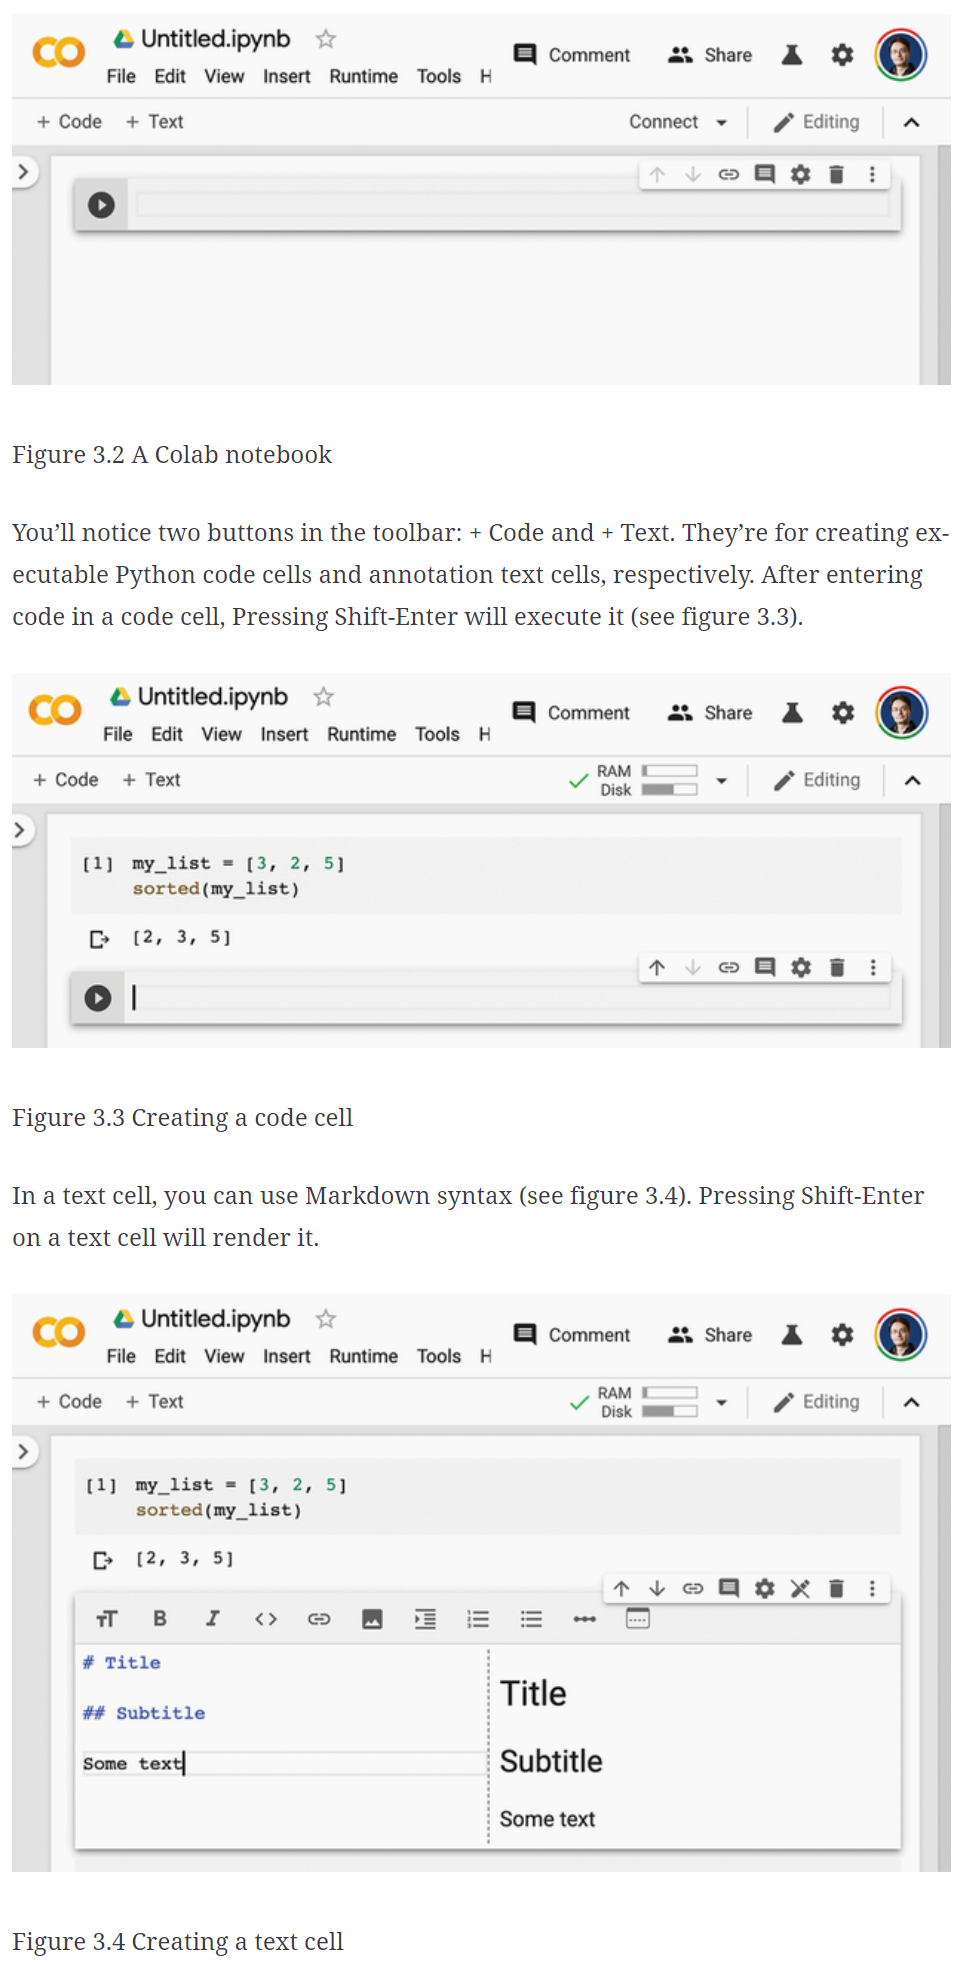
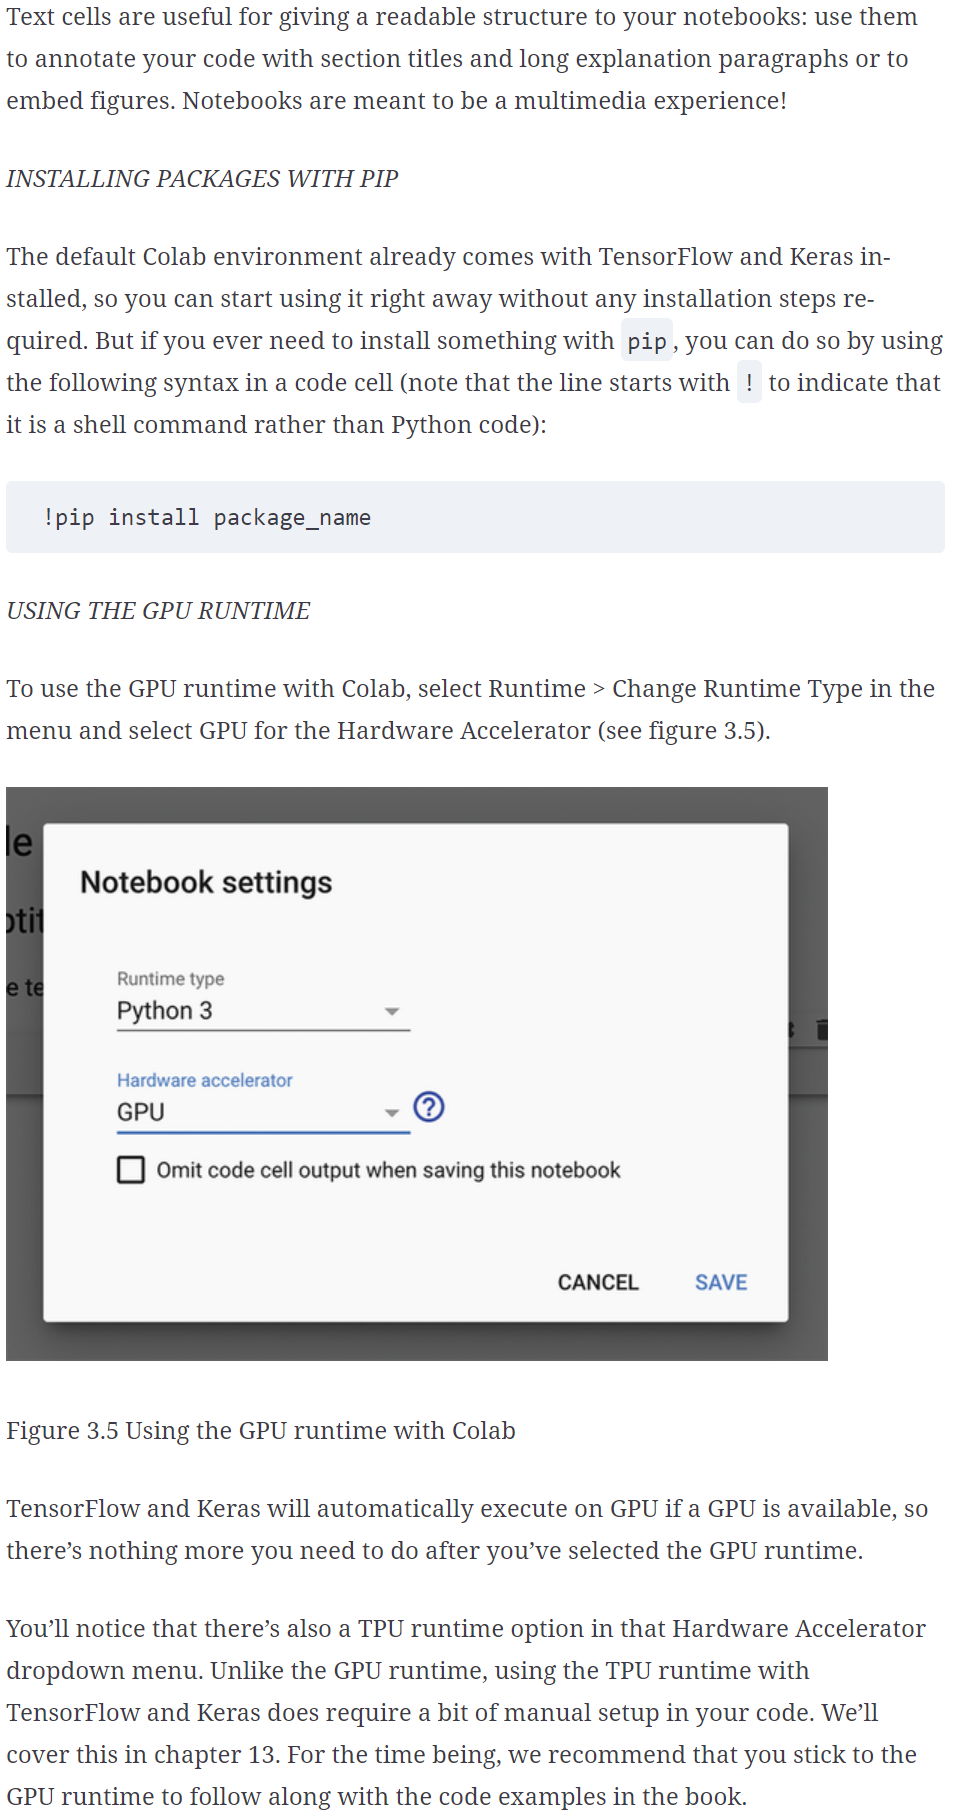
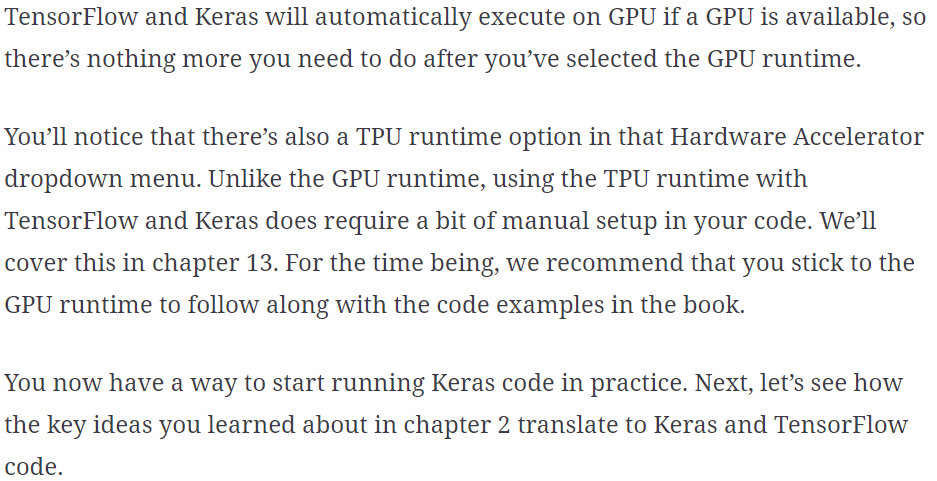3.2.

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.44942525]
 [ 0.7934738 ]
 [-0.43233925]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.78032243]
 [0.10173798]
 [0.97862303]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.27055308],
       [-1.4002309 ],
       [-0.7739788 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)  # slope of y=x**2 is 2x.  So, at point x=3 the slope is 6

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient  # slope of y=x**2 is 2x.  So, at point x=3 the slope is 6

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)  # speed at time 0 is zero
acceleration  # location = 1/2 at**2 and a is acceleration due to gravity = 9.8 m/s**2

tf.Tensor(0.0, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

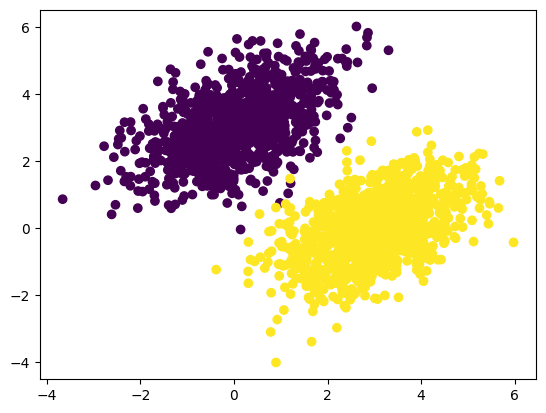

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

Now let’s create a linear classifier that can learn to separate these two blobs. A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.

As you’ll see, it’s actually a much simpler example than the end-to-end example of a toy two-layer neural network you saw at the end of chapter 2. However, this time you should be able to understand everything about the code, line by line.

Let’s create our variables, W and b, initialized with random values and with zeros, respectively.

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

❶ The inputs will be 2D points.

❷ The output predictions will be a single score per sample (close to 0 if the sample is predicted to be in class 0, and close to 1 if the sample is predicted to be in class 1

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such, for a given input point [x, y], its prediction value is prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.

The following listing shows our loss function.).

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

❶ per_sample_losses will be a tensor with the same shape as targets and predictions, containing per-sample loss scores.

❷ We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.

Next is the training step, which receives some training data and updates the weights W and b so as to minimize the loss on the don**

**The training step function**

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:  # Forward pass, inside a gradient tape scope
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # Retrieve the gradient of the loss with regard to weights.
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # Update the weights.
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training step (gradient computation and weight update) for all the data, rather than iterate over the data in small batches. On one hand, this means that each training step will take much longer to run, since we’ll compute the forward pass and the gradients for 2,000 samples at once. On the other hand, each gradient update will be much more effective at reducing the loss on the training data, since it will encompass information from all training samples instead of, say, only 128 random samples. As a result, we will need many fewer steps of training, and we should use a larger learning rate than we would typically use for mini-batch training (we’ll use learning_rate = 0.1, defined in listing 3.20).

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.1568
Loss at step 1: 0.9212
Loss at step 2: 0.2652
Loss at step 3: 0.1639
Loss at step 4: 0.1407
Loss at step 5: 0.1291
Loss at step 6: 0.1199
Loss at step 7: 0.1117
Loss at step 8: 0.1042
Loss at step 9: 0.0974
Loss at step 10: 0.0911
Loss at step 11: 0.0854
Loss at step 12: 0.0802
Loss at step 13: 0.0755
Loss at step 14: 0.0711
Loss at step 15: 0.0672
Loss at step 16: 0.0636
Loss at step 17: 0.0603
Loss at step 18: 0.0572
Loss at step 19: 0.0545
Loss at step 20: 0.0520
Loss at step 21: 0.0497
Loss at step 22: 0.0476
Loss at step 23: 0.0457
Loss at step 24: 0.0439
Loss at step 25: 0.0423
Loss at step 26: 0.0409
Loss at step 27: 0.0395
Loss at step 28: 0.0383
Loss at step 29: 0.0372
Loss at step 30: 0.0362
Loss at step 31: 0.0353
Loss at step 32: 0.0344
Loss at step 33: 0.0337
Loss at step 34: 0.0330
Loss at step 35: 0.0323
Loss at step 36: 0.0317
Loss at step 37: 0.0312
Loss at step 38: 0.0307
Loss at step 39: 0.0303


After 40 steps, the training loss seems to have stabilized around 0.025. Let’s plot how our linear model classifies the training data points. Because our targets are zeros and ones, a given input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5

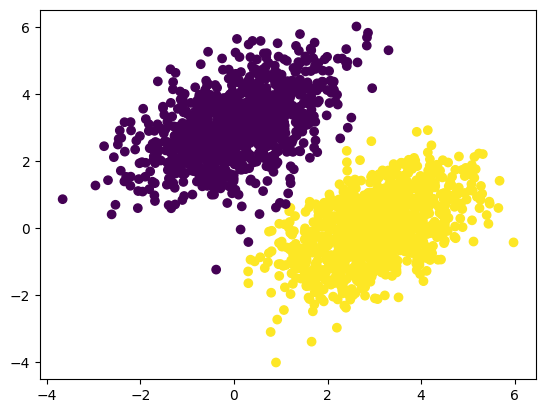

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Recall that the prediction value for a given point [x, y] is simply prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. Thus, class 0 is defined as w1 * x + w2 * y + b < 0.5, and class 1 is defined as w1 * x + w2 * y + b > 0.5. You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. Above the line is class 1, and below the line is class 0. You may be used to seeing line equations in the format y = a * x + b; in the same format, our line becomes y = - w1 / w2 * x + (0.5 - b) / w2.

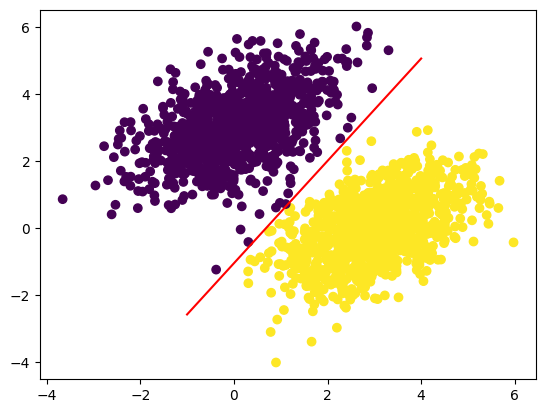

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]  # This is our line’s equation.
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

At this point, you know the basics of TensorFlow, and you can use it to implement a toy model from scratch, such as the batch linear classifier in the previous section, or the toy neural network at the end of chapter 2. That’s a solid foundation to build upon. It’s now time to move on to a more productive, more robust path to deep learning: the Keras API.

### Layers: The building blocks of deep learning

The fundamental data structure in neural networks is the layer, to which you were introduced in chapter 2. A layer is a data processing module that takes as input one or more tensors and that outputs one or more tensors. Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.

Different types of layers are appropriate for different tensor formats and different types of data processing. For instance, simple vector data, stored in rank-2 tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras). Sequence data, stored in rank-3 tensors of shape (samples, timesteps, features), is typically processed by recurrent layers, such as an LSTM layer, or 1D convolution layers (Conv1D). Image data, stored in rank-4 tensors, is usually processed by 2D convolution layers (Conv2D).

You can think of layers as the LEGO bricks of deep learning, a metaphor that is made explicit by Keras. Building deep learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines.

#### The base Layer class in Keras

A simple API should have a single abstraction around which everything is centered. In Keras, that’s the Layer class. Everything in Keras is either a Layer or something that closely interacts with a Layer.

A Layer is an object that encapsulates some state (weights) and some computation (a forward pass). The weights are typically defined in a build() (although they could also be created in the constructor, __init__()), and the computation is defined in the call() method.

In the previous chapter, we implemented a NaiveDense class that contained two weights W and b and applied the computation output = activation(dot(input, W) + b). This is what the same layer would look like in Keras.

**A `Dense` layer implemented as a `Layer` subclass**

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):  # All Keras layers inherit from the base Layer class.

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):  # Weight creation takes place in the build() method.
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")  # add_weight() is a shortcut method for creating weights. It is also possible to create standalone variables and assign them as layer attributes, like self.W = tf.Variable(tf.random.uniform(w_shape)).
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):  # We define the forward pass computation in the call() method.
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

Once instantiated, a layer like this can be used just like a function, taking as input a TensorFlow tensor:

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)  # instantiate layer
input_tensor = tf.ones(shape=(2, 784))  # create inputs
output_tensor = my_dense(input_tensor)  # output is the input layers passed to the dense layer
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

Just like with LEGO bricks, you can only “clip” together layers that are compatible. The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape. Consider the following example:

In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")  # dense layer with 32 output units

This layer will return a tensor where the first dimension has been transformed to be 32. It can only be connected to a downstream layer that expects 32-dimensional vectors as its input.

When using Keras, you don’t have to worry about size compatibility most of the time, because the layers you add to your models are dynamically built to match the shape of the incoming layer. For instance, suppose you write the following:

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

The layers didn’t receive any information about the shape of their inputs—instead, they automatically inferred their input shape as being the shape of the first inputs they see.

In the toy version of the Dense layer we implemented in chapter 2 (which we named NaiveDense), we had to pass the layer’s input size explicitly to the constructor in order to be able to create its weights. That’s not ideal, because it would lead to models that look like this, where each new layer needs to be made aware of the shape of the layer before it:

model = NaiveSequential([

    NaiveDense(input_size=784, output_size=32, activation="relu")
    ,
    NaiveDense(input_size=32, output_size=64, activation="relu"
    ),
    NaiveDense(input_size=64, output_size=32, activation="relu
    "),
    NaiveDense(input_size=32, output_size=10, activation="softmax")
])

It would be even worse if the rules used by a layer to produce its output shape are complex. For instance, what if our layer returned outputs of shape (batch, input_ size * 2 if input_size % 2 == 0 else input_size * 3)?

If we were to reimplement our NaiveDense layer as a Keras layer capable of automatic shape inference, it would look like the previous SimpleDense layer (see listing 3.22), with its build() and call() methods.

In SimpleDense, we no longer create weights in the constructor like in the NaiveDense example; instead, we create them in a dedicated state-creation method, build(), which receives as an argument the first input shape seen by the layer. The build() method is called automatically the first time the layer is called (via its __call__() method). In fact, that’s why we defined the computation in a separate call() method rather than in the __call__() method directly. The __call__() method of the base layer schematically looks like this:

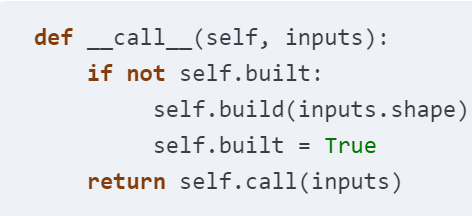

With automatic shape inference, our previous example becomes simple and neat

In [29]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

Note that automatic shape inference is not the only thing that the Layer class’s __call__() method handles. It takes care of many more things, in particular routing between eager and graph execution (a concept you’ll learn about in chapter 7), and input masking (which we’ll cover in chapter 11). For now, just remember: when implementing your own layers, put the forward pass in the call() method.

### From layers to models
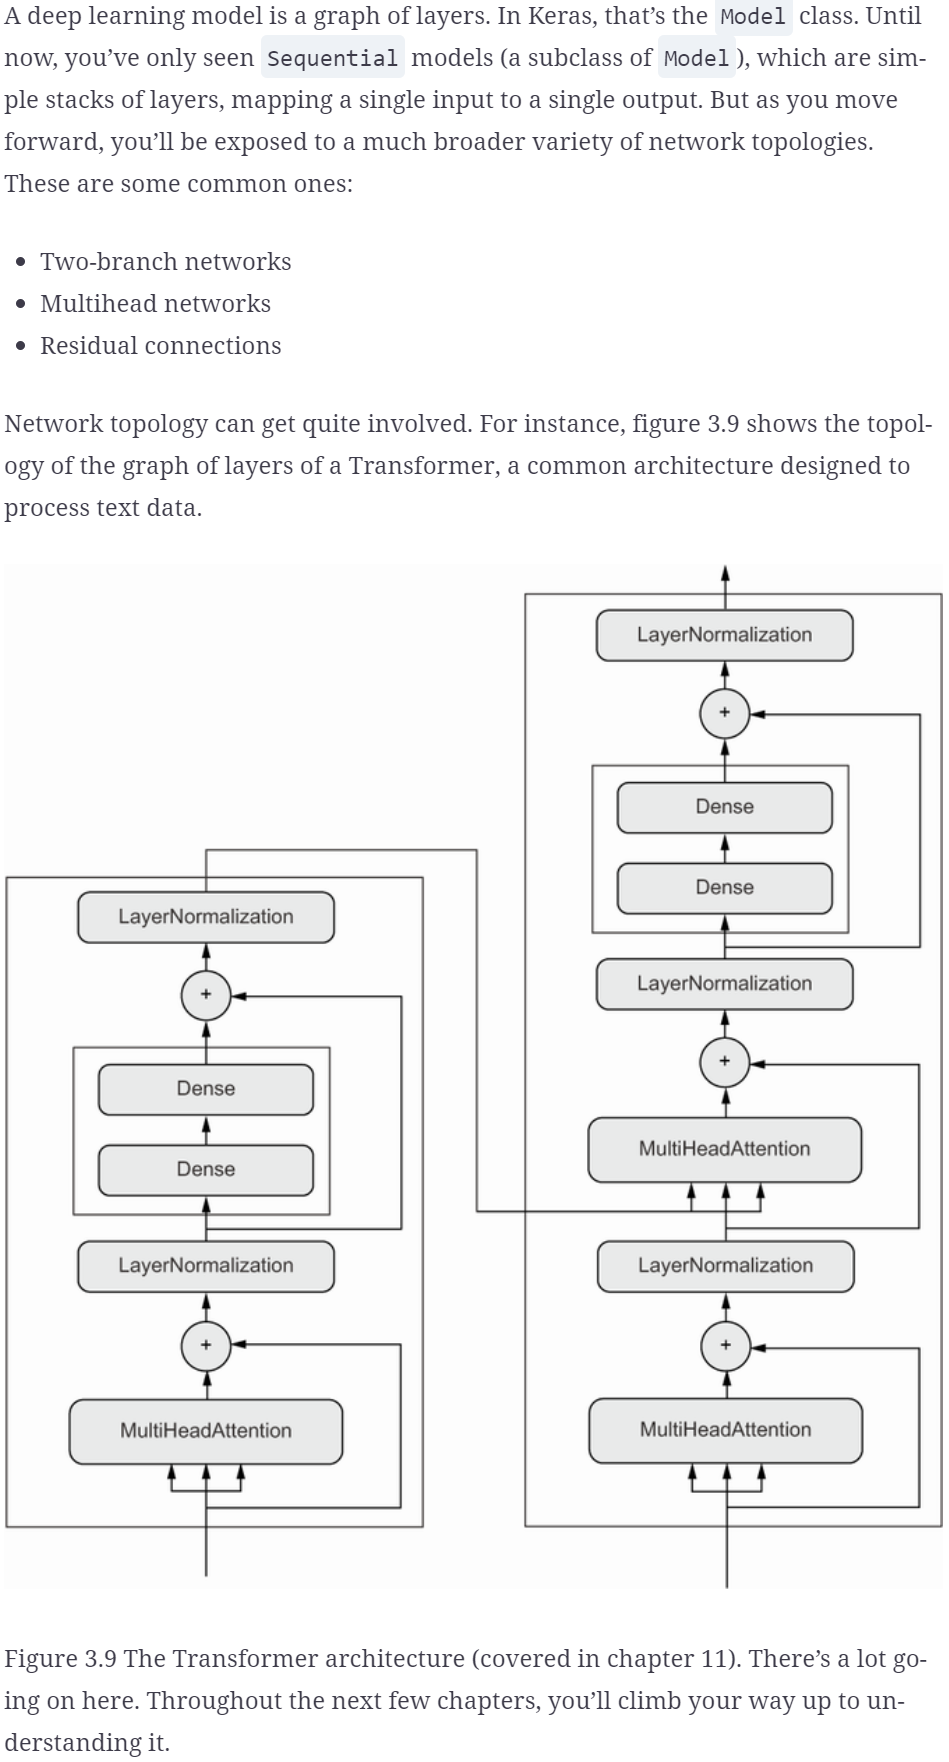

There are generally two ways of building such models in Keras: you could directly subclass the Model class, or you could use the Functional API, which lets you do more with less code. We’ll cover both approaches in chapter 7.

The topology of a model defines a hypothesis space. You may remember that in chapter 1 we described machine learning as searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal. By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations.

To learn from data, you have to make assumptions about it. These assumptions define what can be learned. As such, the structure of your hypothesis space—the architecture of your model—is extremely important. It encodes the assumptions you make about your problem, the prior knowledge that the model starts with. For instance, if you’re working on a two-class classification problem with a model made of a single Dense layer with no activation (a pure affine transformation), you are assuming that your two classes are linearly separable.

Picking the right network architecture is more an art than a science, and although there are some best practices and principles you can rely on, only practice can help you become a proper neural-network architect. The next few chapters will both teach you explicit principles for building neural networks and help you develop intuition as to what works or doesn’t work for specific problems. You’ll build a solid intuition about what type of model architectures work for different kinds of problems, how to build these networks in practice, how to pick the right learning configuration, and how to tweak a model until it yields the results you want to see.

### The "compile" step: Configuring the learning process

Once the model architecture is defined, you still have to choose three more things:

Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.

Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

Metrics—The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.

Once you’ve picked your loss, optimizer, and metrics, you can use the built-in compile() and fit() methods to start training your model. Alternatively, you could also write your own custom training loops—we’ll cover how to do this in chapter 7. It’s a lot more work! For now, let’s take a look at compile() and fit().

The compile() method configures the training process—you’ve already been introduced to it in your very first neural network example in chapter 2. It takes the arguments optimizer, loss, and metrics (a list):

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])  # define a linear classifier
model.compile(optimizer="rmsprop",  # specify optimizer (case insenstive)
              loss="mean_squared_error",  # what loss are we optimizing to
              metrics=["accuracy"])  # specify a list of metrics (accuracy in this case)

In the preceding call to compile(), we passed the optimizer, loss, and metrics as strings (such as "rmsprop"). These strings are actually shortcuts that get converted to Python objects. For instance, "rmsprop" becomes keras.optimizers.RMSprop(). Importantly, it’s also possible to specify these arguments as object instances, like this:

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy
              ()])
This is useful if you want to pass your own custom losses or metrics, or if you want to further configure the objects you’re using—for instance, by passing a learning_rate argument to the optimizer:

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=my_custom_loss,
              metrics=[my_custom_metric_1, my_custom_metric_2])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In chapter 7, we’ll cover how to create custom losses and metrics. In general, you won’t have to create your own losses, metrics, or optimizers from scratch, because Keras offers a wide range of built-in options that is likely to include what you need:

Optimizers:

SGD (with or without momentum)

RMSprop

Adam

Adagrad

Etc.

Losses:

CategoricalCrossentropy

SparseCategoricalCrossentropy

BinaryCrossentropy

MeanSquaredError

KLDivergence

CosineSimilarity

Etc.

Metrics:

CategoricalAccuracy

SparseCategoricalAccuracy

BinaryAccuracy

AUC

Precision

Recall

Etc.

### Picking a loss function

Choosing the right loss function for the right problem is extremely important: your network will take any shortcut it can to minimize the loss, so if the objective doesn’t fully correlate with success for the task at hand, your network will end up doing things you may not have wanted. 

Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. For instance, you’ll use binary crossentropy for a two-class classification problem, categorical crossentropy for a many-class classification problem, and so on. Only when you’re working on truly new research problems will you have to develop your own loss functions. In the next few chapters, we’ll detail explicitly which loss functions to choose for a wide range of common tasks.

### Understanding the fit() method

After compile() comes fit(). The fit() method implements the training loop itself. These are its key arguments:

The data (inputs and targets) to train on. It will typically be passed either in the form of NumPy arrays or a TensorFlow Dataset object. You’ll learn more about the Dataset API in the next chapters.

The number of epochs to train for: how many times the training loop should iterate over the data passed.

The batch size to use within each epoch of mini-batch gradient descent: the number of training examples considered to compute the gradients for one weight update step.

**Calling `fit()` with NumPy data**

In [32]:
history = model.fit(
    inputs,
    targets,
    epochs=5,  # 5 runs through all rows of data.  Keep submitting batches until all rows of data have been seen for one epoch
    batch_size=128  # training loop takes 128 examples (rows of data) per batch
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5005 - loss: 5.5566  
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5078 - loss: 4.9072 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4944 - loss: 4.8306 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5143 - loss: 4.4505 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.4986 - loss: 4.0991 


The call to fit() returns a History object. This object contains a history field, which is a dict mapping keys such as "loss" or specific metric names to the list of their per-epoch values.

In [33]:
history.history

{'binary_accuracy': [0.5065000057220459,
  0.5074999928474426,
  0.5074999928474426,
  0.5080000162124634,
  0.5090000033378601],
 'loss': [5.343257904052734,
  4.973616600036621,
  4.668306350708008,
  4.378269195556641,
  4.096915245056152]}

### Monitoring loss and metrics on validation data

The goal of machine learning is not to obtain models that perform well on the training data, which is easy—all you have to do is follow the gradient. The goal is to obtain models that perform well in general, and particularly on data points that the model has never encountered before. Just because a model performs well on its training data doesn’t mean it will perform well on data it has never seen! For instance, it’s possible that your model could end up merely memorizing a mapping between your training samples and their targets, which would be useless for the task of predicting targets for data the model has never seen before. We’ll go over this point in much more detail in chapter 5.

To keep an eye on how the model does on new data, it’s standard practice to reserve a subset of the training data as validation data: you won’t be training the model on this data, but you will use it to compute a loss value and metrics value. You do this by using the validation_data argument in fit(). Like the training data, the validation data could be passed as NumPy arrays or as a TensorFlow Dataset object.

**Using the `validation_data` argument**

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))  # shuffle data to avoid one class being all the train or validation data
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))  # 70% train, 30% validation
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,  # training data
    training_targets,  # training target values
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)  # validataion data, loss and accuracy will be calculated, but not used for backpropagation
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9146 - loss: 0.1582 - val_binary_accuracy: 0.9917 - val_loss: 0.0525
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9559 - loss: 0.0707 - val_binary_accuracy: 0.9933 - val_loss: 0.0343
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9534 - loss: 0.0801 - val_binary_accuracy: 0.9917 - val_loss: 0.0388
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9698 - loss: 0.0623 - val_binary_accuracy: 0.9950 - val_loss: 0.0368
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9529 - loss: 0.0762 - val_binary_accuracy: 0.9267 - val_loss: 0.1852


The value of the loss on the validation data is called the “validation loss,” to distinguish it from the “training loss.” Note that it’s essential to keep the training data and validation data strictly separate: the purpose of validation is to monitor whether what the model is learning is actually useful on new data. If any of the validation data has been seen by the model during training, your validation loss and metrics will be flawed.

Note that if you want to compute the validation loss and metrics after the training is complete, you can call the evaluate() method:

loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)


evaluate() will iterate in batches (of size batch_size) over the data passed and return a list of scalars, where the first entry is the validation loss and the following entries are the validation metrics. If the model has no metrics, only the validation loss is returned (rather than a list).

### Inference: Using a model after training

Once you’ve trained your model, you’re going to want to use it to make predictions on new data. This is called inference. To do this, a naive approach would simply be to __call__() the model:

predictions = model(new_inputs)

However, this will process all inputs in new_inputs at once, which may not be feasible if you’re looking at a lot of data (in particular, it may require more memory than your GPU has).

A better way to do inference is to use the predict() method. It will iterate over the data in small batches and return a NumPy array of predictions. And unlike __call__(), it can also process TensorFlow Dataset objects.

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[ 0.96255124]
 [-0.19538125]
 [ 0.878615  ]
 [ 0.43313923]
 [ 0.90450895]
 [ 1.1456476 ]
 [ 0.49935585]
 [ 1.0254498 ]
 [ 0.36910316]
 [ 1.2545693 ]]


## Summary

TensorFlow is an industry-strength numerical computing framework that can run on CPU, GPU, or TPU. It can automatically compute the gradient of any differentiable expression, it can be distributed to many devices, and it can export programs to various external runtimes—even JavaScript.

Keras is the standard API for doing deep learning with TensorFlow. It’s what we’ll use throughout this book.

Key TensorFlow objects include tensors, variables, tensor operations, and the gradient tape.

The central class of Keras is the Layer. A layer encapsulates some weights and some computation. Layers are assembled into models.

Before you start training a model, you need to pick an optimizer, a loss, and some metrics, which you specify via the model.compile() method.

To train a model, you can use the fit() method, which runs mini-batch gradient descent for you. You can also use it to monitor your loss and metrics on validation data, a set of inputs that the model doesn’t see during training.

Once your model is trained, you use the model.predict() method to generate predictions on new inputs.